In [2]:
import pandas as pd

data = pd.read_csv("data 1/degradation.csv")

In [4]:
voltages_history = data["Voltage"]

In [188]:
import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

class SimpleNN:
    def __init__(self, input_dim=1, output_units=1, optimizer='adam', loss='mse'):
        """
        Initializes the neural network model.

        Parameters:
        - input_dim: Number of input features (default 1 for a simple function).
        - hidden_units: Number of units in the hidden layer (default 10).
        - activation: Activation function for hidden layer (default 'relu').
        - output_units: Number of output units (default 1 for regression).
        - optimizer: Optimizer used during training (default 'adam').
        - loss: Loss function used during training (default 'mse').
        """
        self.input_dim = input_dim
        self.output_units = output_units
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = ['mse']
        self.model = self.build_model()
    
    def build_model(self):
        """
        Builds the neural network model.
        """
        model = Sequential([
        Dense(64, input_dim=self.input_dim, activation='tanh'),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Linear output for regression
        ])

        # Compile the model
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics = self.metrics  )
        return model
    
    def train(self, x_train, y_train, epochs=100, batch_size=32):
        """
        Trains the model on the provided training data.
        
        Parameters:
        - x_train: Input data (features).
        - y_train: Target data (labels).
        - epochs: Number of epochs for training (default 100).
        - batch_size: Number of samples per gradient update (default 1).
        """
        self.history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    
    def predict(self, x):
        """
        Predicts the output for the given input data.
        
        Parameters:
        - x: Input data for prediction.
        
        Returns:
        - Predicted output.
        """
        return self.model.predict(x)
    
    def plot_training_history(self):
        """
        Plots the training loss over epochs.
        """
        plt.plot(self.history.history['loss'])
        plt.title('Model Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
    def plot_predictions(self, x, y_true, y_pred):
        """
        Plots the true values and predicted values on the same graph.
        
        Parameters
        - x: Input data.
        - y_true: True values.
        - y_pred: Predicted values.
        """
        plt.plot(x, y_true, label='True Function', color='blue')
        plt.plot(x, y_pred, label='Predictions', color='red', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
    
    def evaluate(self, x, y):
        return self.model.evaluate(x, y)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


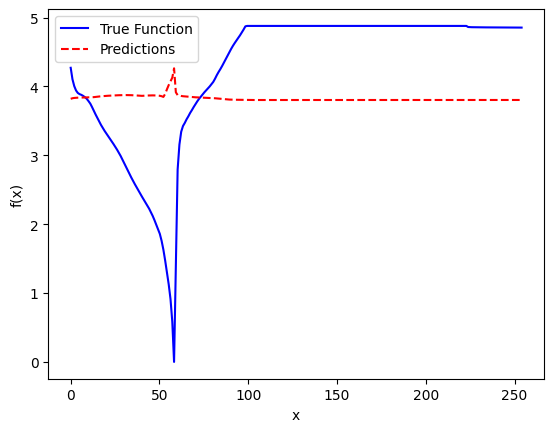

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1406 - mse: 0.1406  


In [191]:
def standardized_positive(x):
    x_std = (x - np.mean(x)) / np.std(x)
    return x_std - np.min(x_std)  # shift so min value is 0

for voltage_h in voltages_history[:1]:
    voltage_h_no_chars = voltage_h.replace("[", "")
    voltage_h_no_chars = voltage_h_no_chars.replace("]", "")
    voltage = np.array([float(v.strip()) for v in voltage_h_no_chars.split()])
    y = standardized_positive(voltage)
    x = np.linspace(0, len(y), len(y))
    model = SimpleNN(input_dim=1, output_units=1, optimizer='adam', loss="mse")
    model.train(x, y)
    model.plot_predictions(x, y, model.predict(y))
    model.evaluate(x, y)

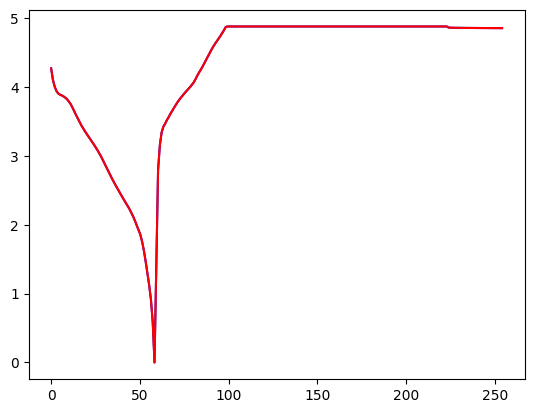

Number of leaves: 132
None


In [ ]:
from sklearn.tree import DecisionTreeRegressor

for voltage_h in voltages_history[:1]:
    voltage_h_no_chars = voltage_h.replace("[", "")
    voltage_h_no_chars = voltage_h_no_chars.replace("]", "")
    voltage = np.array([float(v.strip()) for v in voltage_h_no_chars.split()])
    x = np.linspace(0, len(y), len(y)).reshape(-1, 1)
    # Creazione del modello
    model = DecisionTreeRegressor()
    model.fit(x, y)
    # Predizioni
    y_pred = model.predict(x)
    plt.plot(x, y_pred, color = "blue")
    plt.plot(x, y, color = "red")
    plt.show()

    print("Number of leaves:", model.get_n_leaves())
    
    print(model.max_depth)




In [208]:
from sklearn.linear_model import LinearRegression

def interpolate_on_segments(X, Y, N):
    # Suddividi i dati in N segmenti
    segments = np.array_split(np.column_stack((X, Y)), N)

    # Liste per memorizzare i parametri delle rette (pendenza, intercetta)
    slopes = []
    intercepts = []

    # Per ogni segmento, esegui la regressione lineare
    for segment in segments:
        X_segment = segment[:, 0].reshape(-1, 1)  # X del segmento
        Y_segment = segment[:, 1]  # Y del segmento
        
        # Regressione lineare sul segmento
        model = LinearRegression()
        model.fit(X_segment, Y_segment)

        # Memorizza pendenza e intercetta
        slopes.append(model.coef_[0])
        intercepts.append(model.intercept_)

    return slopes, intercepts

In [209]:
def show_interpolations(X, Y, N):
    # Interpolazione su N tratti
    slopes, intercepts = interpolate_on_segments(X, Y, N)

    # Stampa i parametri delle rette per ogni tratto
    for i in range(N):
        print(f"Tratto {i+1}: pendenza = {slopes[i]}, intercetta = {intercepts[i]}")

    # Visualizza il risultato dell'interpolazione a tratti
    plt.scatter(X, Y, label='Dati Originali', color='blue', alpha=0.6)

    # Plotta le rette per ogni tratto
    for i in range(N):
        # Intervallo X per il tratto
        x_segment = np.linspace(X[i * len(X)//N], X[(i + 1) * len(X)//N - 1], 100)
        y_segment = slopes[i] * x_segment + intercepts[i]
        plt.plot(x_segment, y_segment, label=f'Retta {i+1}')

    plt.title('Interpolazione a tratti')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [217]:
def embeed(data):
    slopes, intercepts = data
    representation = []
    for i in range (len(slopes)):
        representation.append(slopes[i])
        representation.append(intercepts[i])
    return np.array(representation)

In [220]:
curve_embeeding = []
N = 15
for voltage_h in voltages_history:
    voltage_h_no_chars = voltage_h.replace("[", "")
    voltage_h_no_chars = voltage_h_no_chars.replace("]", "")
    voltage = np.array([float(v.strip()) for v in voltage_h_no_chars.split()])
    y = voltage
    x = np.linspace(0, len(y), len(y)).reshape(-1, 1)
    curve_embeeding.append(embeed(interpolate_on_segments(x, y, N)))

In [224]:
soh_values = data["SOH_values"]

In [290]:
class SOHNN:
    def __init__(self, input_dim=1, output_units=1, optimizer='adam', loss='mse'):
        """
        Initializes the neural network model.

        Parameters:
        - input_dim: Number of input features (default 1 for a simple function).
        - hidden_units: Number of units in the hidden layer (default 10).
        - activation: Activation function for hidden layer (default 'relu').
        - output_units: Number of output units (default 1 for regression).
        - optimizer: Optimizer used during training (default 'adam').
        - loss: Loss function used during training (default 'mse').
        """
        self.input_dim = input_dim
        self.output_units = output_units
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = ['mse']
        self.model = self.build_model()
    
    def build_model(self):
        """
        Builds the neural network model.
        """
        model = Sequential([
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(1) # Linear output for regression
        ])

        # Compile the model
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics = self.metrics  )
        return model
    
    def train(self, x_train, y_train, epochs=100, batch_size=32):
        """
        Trains the model on the provided training data.
        
        Parameters:
        - x_train: Input data (features).
        - y_train: Target data (labels).
        - epochs: Number of epochs for training (default 100).
        - batch_size: Number of samples per gradient update (default 1).
        """
        self.history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    
    def predict(self, x):
        """
        Predicts the output for the given input data.
        
        Parameters:
        - x: Input data for prediction.
        
        Returns:
        - Predicted output.
        """
        return self.model.predict(x)
    
    def plot_training_history(self):
        """
        Plots the training loss over epochs.
        """
        plt.plot(self.history.history['loss'])
        plt.title('Model Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
    def plot_predictions(self, x, y_true):
        """
        Plots the true values and predicted values on the same graph.
        
        Parameters
        - x: Input data.
        - y_true: True values.
        """
        y_pred = self.model.predict(x)
        plt.plot(y_true, label = "Ground Truth", color='blue')
        plt.plot(y_pred, label='Predictions', color='red', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.show()
    
    def evaluate(self, x, y):
        return self.model.evaluate(x, y)

In [291]:
x = np.array(curve_embeeding)
y = np.array(soh_values)
model = SOHNN(input_dim = len(x[0]), output_units = 1, optimizer='adam', loss='mse')
model.train(x, y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


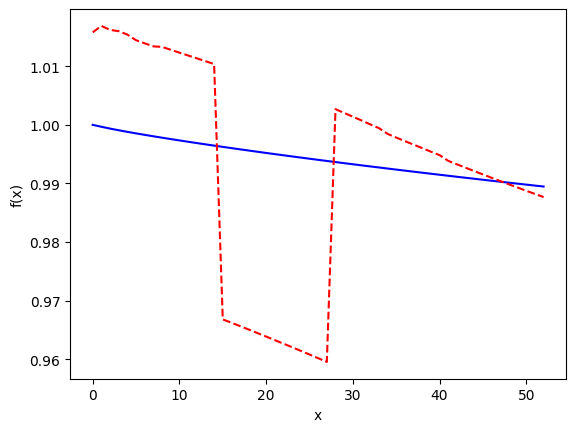

In [292]:
model.plot_predictions(x, y)

Mean Squared Error: 0.0000


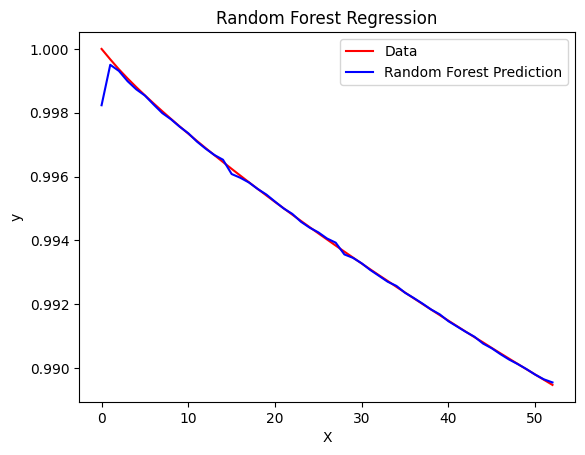

In [297]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Define and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

# Predict on the test set
y_pred = model.predict(x)

# Evaluate performance
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

plt.plot(y, label='Data', color='red')
plt.plot(y_pred, label='Random Forest Prediction', color='blue')
plt.legend()
plt.title('Random Forest Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def rgb_svm_regressor(voltage, vis = False):
    voltage_h_no_chars = voltage_h.replace("[", "")
    voltage_h_no_chars = voltage_h_no_chars.replace("]", "")
    y = np.array([float(v.strip()) for v in voltage_h_no_chars.split()])
    X = np.linspace(0, len(y), len(y)).reshape(-1, 1)

    # Scale input and output
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

    # Create SVR model with RBF kernel
    svr = SVR(kernel='rbf', C = 150, epsilon=0.1, gamma='scale')

    # Fit model
    svr.fit(X_scaled, y_scaled)

    # Predict
    y_pred_scaled = svr.predict(X_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    if vis:
        # Plot results
        plt.figure(figsize=(8, 4))
        plt.scatter(X, y, color='lightblue', label='Data')
        plt.plot(X, y_pred, color='red', label='SVR prediction')
        plt.title('Support Vector Regression with RBF Kernel')
        plt.legend()
        plt.show()
    return svr.support_vectors_


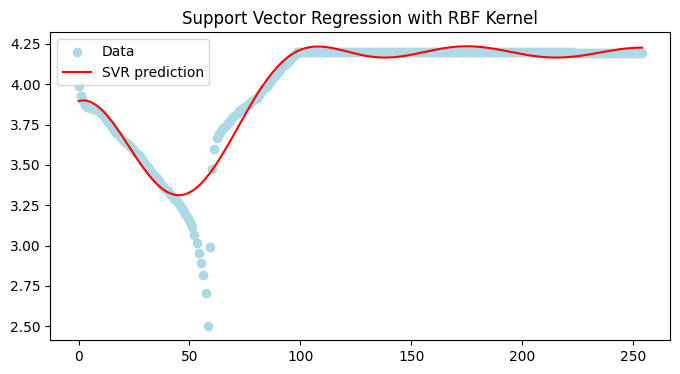

56


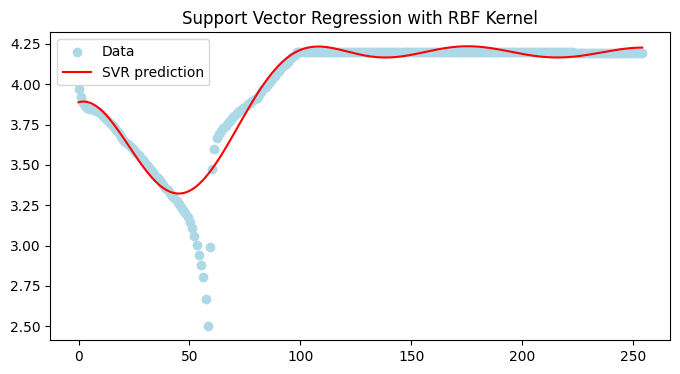

54


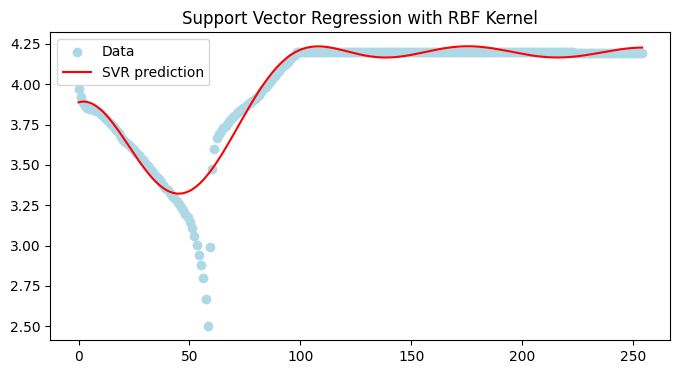

54


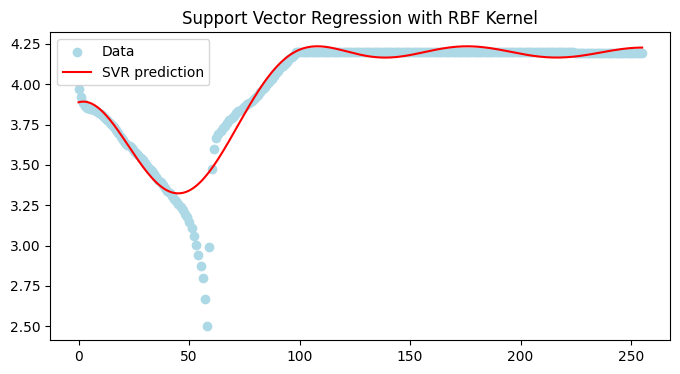

56


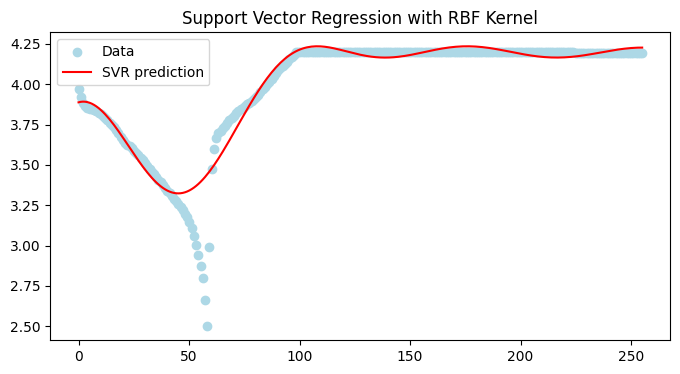

55


In [92]:
minimo = 100
for voltage_h in voltages_history[:5]:
    sv = rgb_svm_regressor(voltage, vis = True)
    print(len(sv))